In [150]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
%cd /content/drive/MyDrive/SBUX.US_D1.csv

[Errno 20] Not a directory: '/content/drive/MyDrive/SBUX.US_D1.csv'
/content


In [152]:
!ls

DataForML.pkl  drive  Final_XGB_Model.pkl  sample_data


In [154]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# 1. Reading The dataset

In [155]:
# Reading the dataset
import pandas as pd
import numpy as np
StarbucksData=pd.read_csv('/content/drive/MyDrive/SBUX.US_D1.csv', encoding='latin')
print('Shape before deleting duplicate values:', StarbucksData.shape)

# Removing duplicate rows
StarbucksData=StarbucksData.drop_duplicates()
print('Shape After deleting duplicate values:', StarbucksData.shape)

# Start observing the Quantitative/Categorical/Qualitative variables
StarbucksData.head(10)


Shape before deleting duplicate values: (6639, 6)
Shape After deleting duplicate values: (6639, 6)


,datetime,open,high,low,close,volume
0,1998-01-02,38.38,38.63,37.31,37.50,594000
1,1998-01-05,37.63,37.78,36.75,37.13,644000
2,1998-01-06,37.13,37.38,35.56,35.63,1183300
3,1998-01-07,35.50,36.44,34.25,34.69,2039005
4,1998-01-08,34.56,36.01,34.00,35.76,1638105
5,1998-01-09,35.75,36.01,34.37,35.13,713703
6,1998-01-12,34.50,35.37,34.25,35.19,855603
7,1998-01-13,35.38,35.63,35.00,35.56,460200
8,1998-01-14,35.63,35.63,35.07,35.19,336200
9,1998-01-15,35.13,35.26,33.75,34.00,742700


# 3. Targeted Variable Distribution

<Axes: >

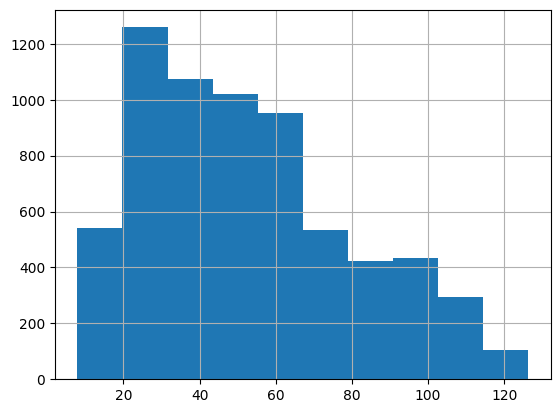

In [160]:
%matplotlib inline
StarbucksData['high'].hist()

In [161]:
StarbucksData.head()

,open,high,low,close,volume
0,38.38,38.63,37.31,37.50,594000
1,37.63,37.78,36.75,37.13,644000
2,37.13,37.38,35.56,35.63,1183300
3,35.50,36.44,34.25,34.69,2039005
4,34.56,36.01,34.00,35.76,1638105


In [162]:
StarbucksData.tail()

,open,high,low,close,volume
6634,90.95,91.53,90.60,91.07,5115057
6635,91.06,91.09,91.05,91.05,4882
6636,91.26,92.96,91.17,92.07,3796900
6637,92.00,92.72,91.21,92.42,6207319
6638,92.55,92.87,90.87,91.59,4772185


# Removing Unwanted columns

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to remove
columns_to_remove = ['datetime']

for col in columns_to_remove:
    if col in StarbucksData.columns:
        StarbucksData = StarbucksData.drop(columns=col)
        print(f"Removed column: {col}")
    else:
        print(f"Column not found: {col}")

# To see the DataFrame after attempting to drop the columns
print(StarbucksData.head())

Column not found: datetime
    open   high    low  close   volume
0  38.38  38.63  37.31  37.50   594000
1  37.63  37.78  36.75  37.13   644000
2  37.13  37.38  35.56  35.63  1183300
3  35.50  36.44  34.25  34.69  2039005
4  34.56  36.01  34.00  35.76  1638105


In [164]:
StarbucksData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6639 entries, 0 to 6638
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    6639 non-null   float64
 1   high    6639 non-null   float64
 2   low     6639 non-null   float64
 3   close   6639 non-null   float64
 4   volume  6639 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 259.5 KB


# 2. Problem statement definition

In [165]:
StarbucksData.describe(include='all')

,open,high,low,close,volume
count,6639.000000,6639.000000,6639.000000,6639.000000,6.639000e+03
mean,52.025905,52.605072,51.438399,52.034272,5.793768e+06
std,27.161870,27.312972,26.994025,27.155434,4.658699e+06
min,7.520000,7.900000,7.060000,7.200000,3.000000e+02
25%,29.735000,30.130000,29.290000,29.665000,2.875130e+06
50%,49.340000,50.000000,48.660000,49.400000,4.693841e+06
75%,71.500000,72.215000,70.680000,71.390000,7.301760e+06
max,126.080000,126.320000,124.810000,126.060000,7.234445e+07


In [166]:
StarbucksData.nunique()

,0
open,4356
high,4370
low,4301
close,4417
volume,6623


# 4. Visualising the distribution of Target

In [167]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

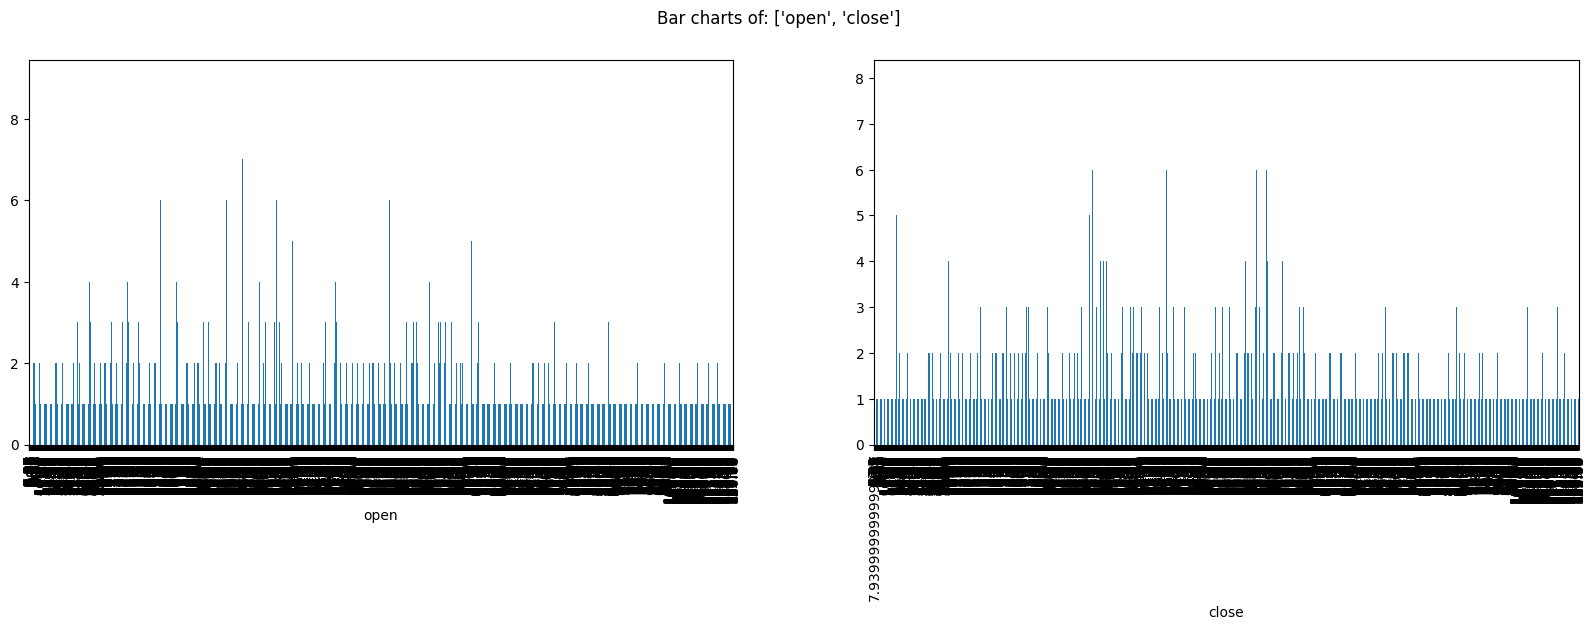

In [168]:
PlotBarCharts(inpData=StarbucksData, colsToPlot=['open','close'])

# 5. Data exploration at basic level

array([[<Axes: title={'center': 'open'}>,
        <Axes: title={'center': 'low'}>],
       [<Axes: title={'center': 'close'}>,
        <Axes: title={'center': 'volume'}>]], dtype=object)

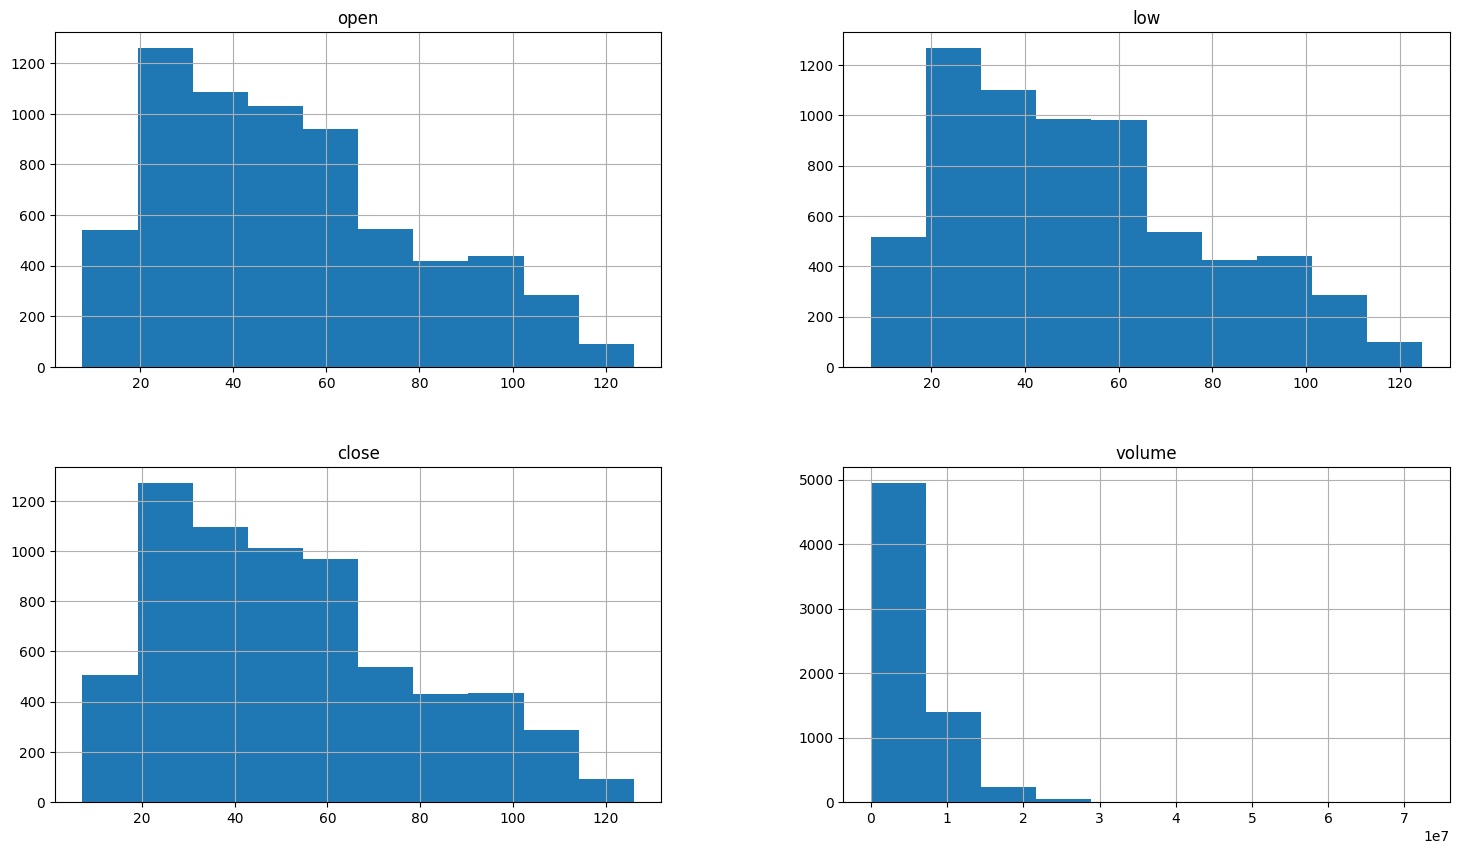

In [169]:
StarbucksData.hist(['open', 'low', 'close', 'volume'], figsize=(18,10))

In [170]:
StarbucksData['volume'][StarbucksData['volume']<60].sort_values(ascending=False)

,volume


In [171]:
StarbucksData['volume'][StarbucksData['volume']>60] =51.13

array([[<Axes: title={'center': 'volume'}>]], dtype=object)

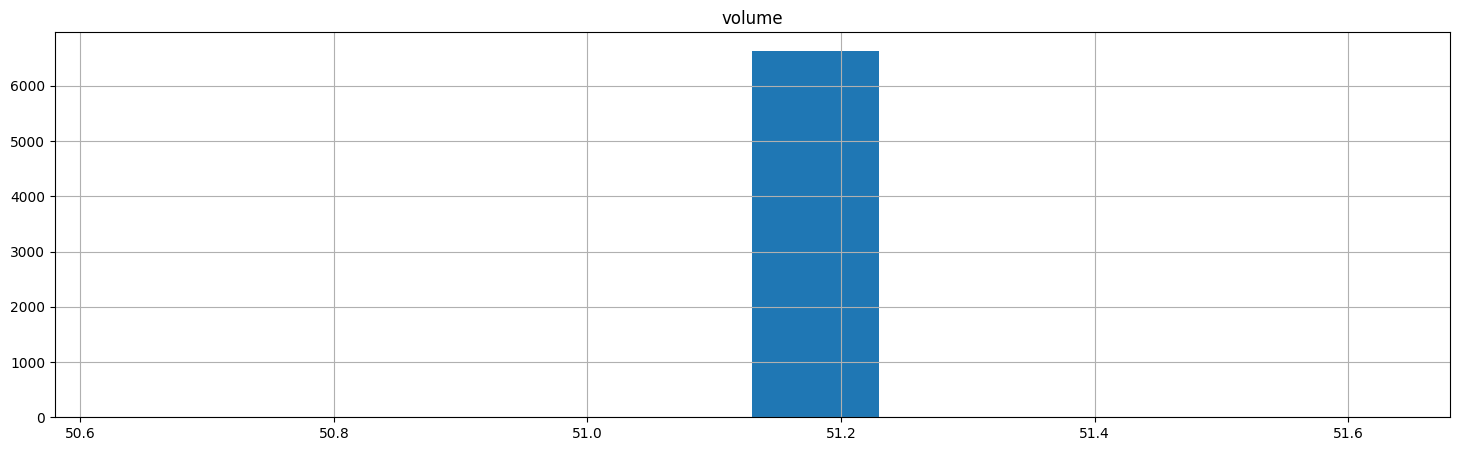

In [172]:
StarbucksData.hist(['volume'], figsize=(18,5))

# 9. Removal of outliers and missing values

In [173]:
StarbucksData.isnull().sum()

,0
open,0
high,0
low,0
close,0
volume,0


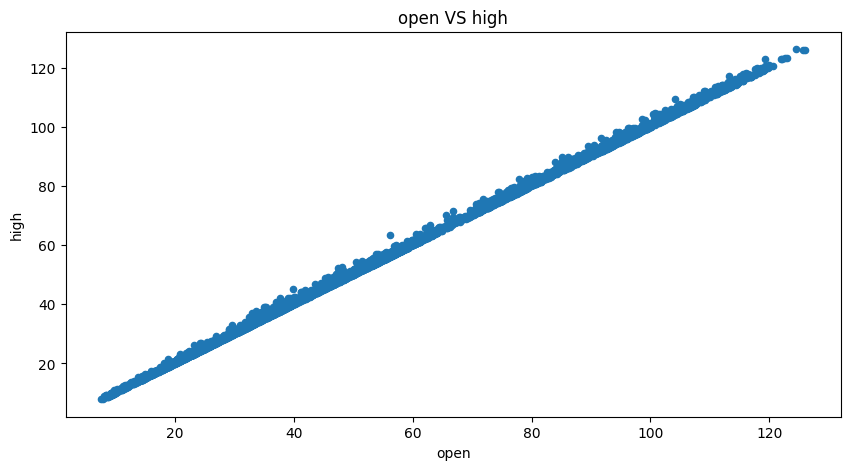

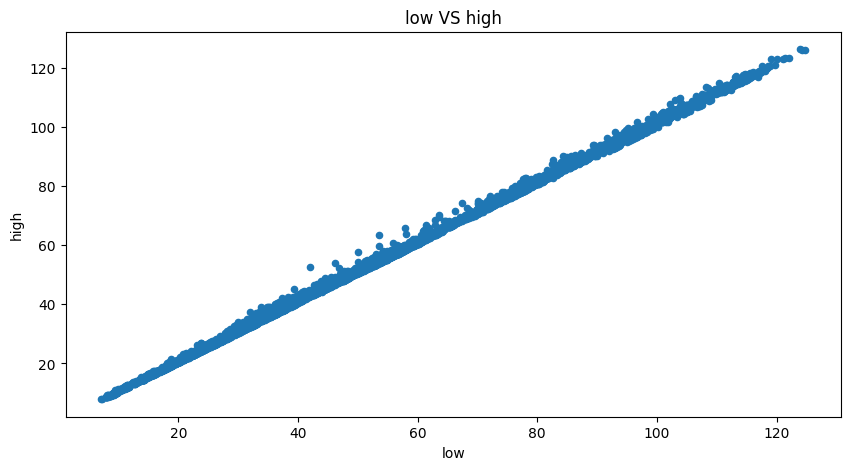

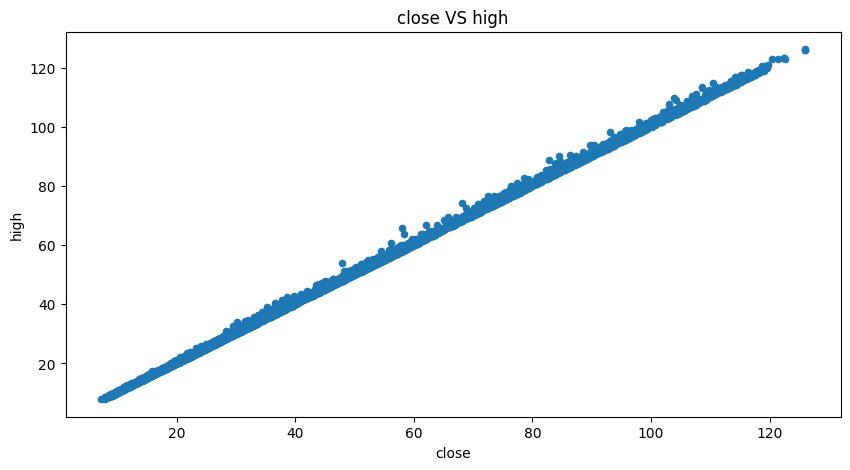

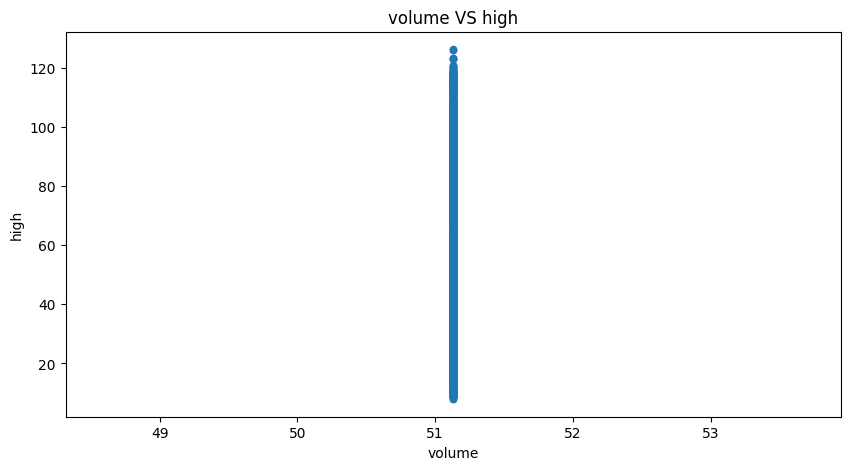

In [174]:
ContinuousCols=['open', 'low', 'close', 'volume']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    StarbucksData.plot.scatter(x=predictor, y='high', figsize=(10,5), title=predictor+" VS "+ 'high')

# 8. Feature Selection based on data distribution

In [175]:
# Calculating correlation matrix
ContinuousCols=['high', 'open', 'low', 'close', 'volume']  # Removed 'datetime'

# Creating the correlation matrix
CorrelationData=StarbucksData[ContinuousCols].corr()
CorrelationData

,high,open,low,close,volume
high,1.000000,0.999763,0.999640,0.999770,NaN
open,0.999763,1.000000,0.999742,0.999524,NaN
low,0.999640,0.999742,1.000000,0.999762,NaN
close,0.999770,0.999524,0.999762,1.000000,NaN
volume,NaN,NaN,NaN,NaN,NaN


In [176]:
CorrelationData['high'][abs(CorrelationData['high']) > 0.5 ]

,high
high,1.000000
open,0.999763
low,0.999640
close,0.999770


# 10. Visual and Statistic Correlation analysis for selection of best features

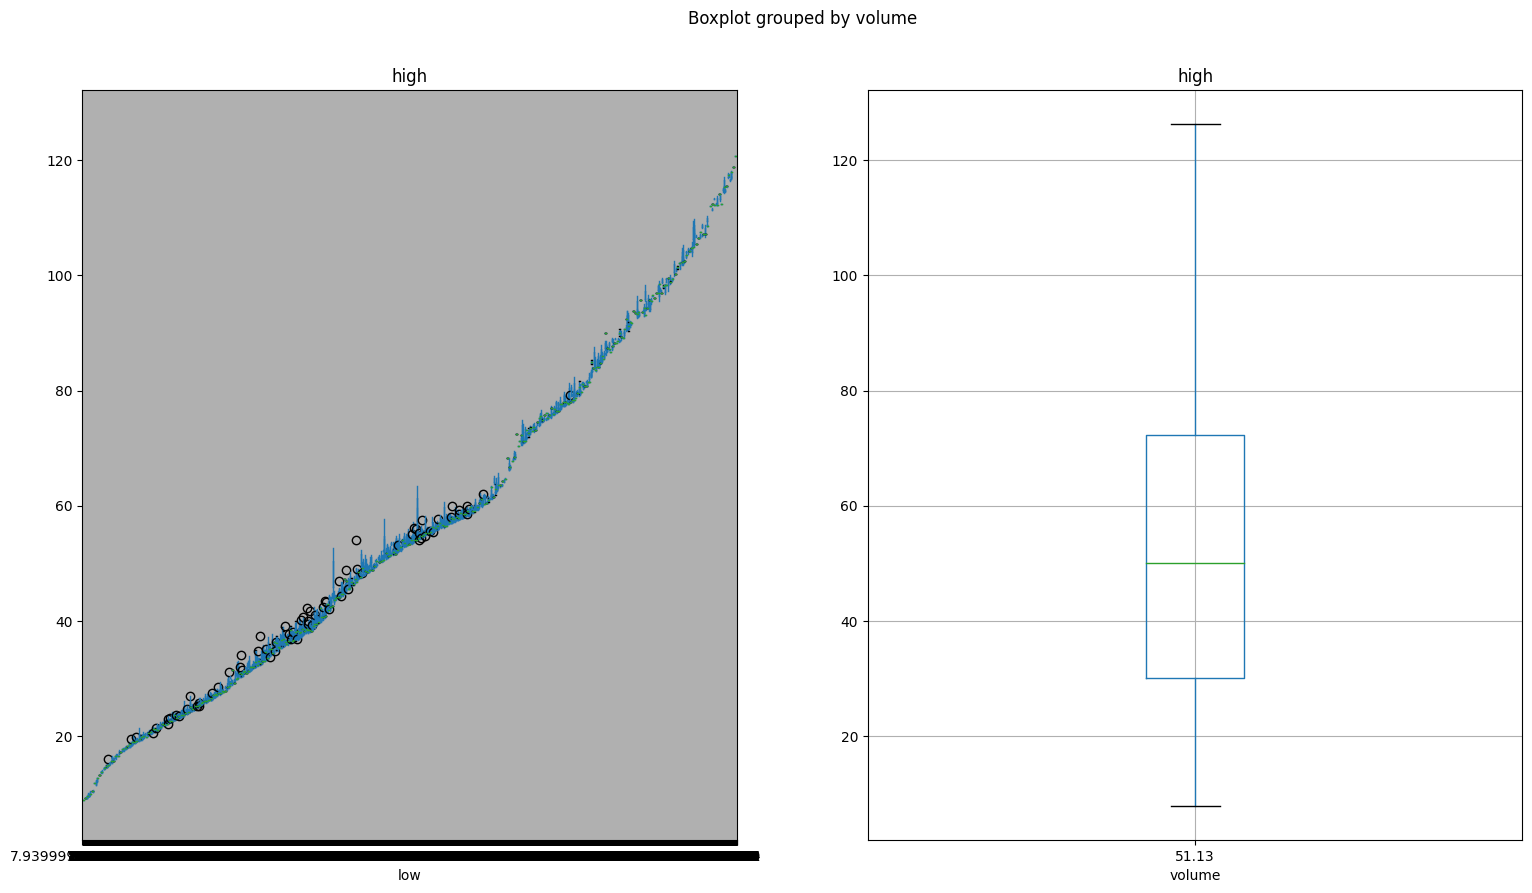

In [177]:
CategoricalColsList=['low', 'volume']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,10))

# Creating box plots for each continuous predictor against the Target Variable "high"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    StarbucksData.boxplot(column='high', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [178]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

CategoricalPredictorList=['open', 'close']
FunctionAnova(inpData=StarbucksData,
              TargetVariable='high',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

open is correlated with high | P-Value: 0.0
close is correlated with high | P-Value: 0.0


['open', 'close']

In [180]:
SelectedColumns=['open', 'high', 'low', 'close', 'volume']  # Removed 'datetime'

# final columns
DataForML=StarbucksData[SelectedColumns]
DataForML.head()

,open,high,low,close,volume
0,38.38,38.63,37.31,37.50,51.13
1,37.63,37.78,36.75,37.13,51.13
2,37.13,37.38,35.56,35.63,51.13
3,35.50,36.44,34.25,34.69,51.13
4,34.56,36.01,34.00,35.76,51.13


# 11. Data Conversion to numeric values for machine learning predictive analysis

In [181]:
DataForML.to_pickle('DataForML.pkl')

In [182]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# putting Target Variable to the data
DataForML_Numeric['high']=StarbucksData['high']

# sample rows
DataForML_Numeric.head()

,open,high,low,close,volume
0,38.38,38.63,37.31,37.50,51.13
1,37.63,37.78,36.75,37.13,51.13
2,37.13,37.38,35.56,35.63,51.13
3,35.50,36.44,34.25,34.69,51.13
4,34.56,36.01,34.00,35.76,51.13


In [183]:
DataForML_Numeric.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [184]:

TargetVariable='high'
Predictors=['open', 'low', 'close', 'volume']  # Removed 'datetime'

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [185]:
#Standardization of the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()

PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [186]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4647, 4)
(4647,)
(1992, 4)
(1992,)


# 13. Investigating multiple Regression algorithms

In [188]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['high']-TestingDataResults['Predictedhigh']))/TestingDataResults['high'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9998302780695274

##### Model Validation and Accuracy Calculations ##########
       open       low     close  volume    high  Predictedhigh
0  0.334683  0.337410  0.335100     0.0   47.54           48.0
1  0.502530  0.509469  0.512788     0.0   68.21           68.0
2  0.119686  0.122887  0.122665     0.0   21.85           22.0
3  0.249663  0.252144  0.254417     0.0   37.65           38.0
4  0.875843  0.870998  0.871025     0.0  111.69          112.0
Mean Accuracy on test data: 99.10775768180177
Median Accuracy on test data: 99.32885906040269

Accuracy values for 10-fold Cross Validation:
 [98.97014598 99.24794514 99.5535399  99.45022545 99.24955049 99.59638437
 99.65028454 99.64707299 99.57719054 99.57230884]

Final Average Accuracy of the model: 99.45


DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9983077844357447

##### Model Validation and Accuracy Calculations ##########
       open       low     close  volume    high  Predictedhigh
0  0.334683  0.337410  0.335100     0.0   47.54           48.0
1  0.502530  0.509469  0.512788     0.0   68.21           66.0
2  0.119686  0.122887  0.122665     0.0   21.85           22.0
3  0.249663  0.252144  0.254417     0.0   37.65           39.0
4  0.875843  0.870998  0.871025     0.0  111.69          113.0
Mean Accuracy on test data: 97.07822162752849
Median Accuracy on test data: 98.22595704948645

Accuracy values for 10-fold Cross Validation:
 [97.11249377 95.20326796 97.77182835 95.28085053 80.12682526 98.23486658
 98.60751822 98.02095888 98.23145466 98.14946372]

Final Average Accuracy of the model: 95.67


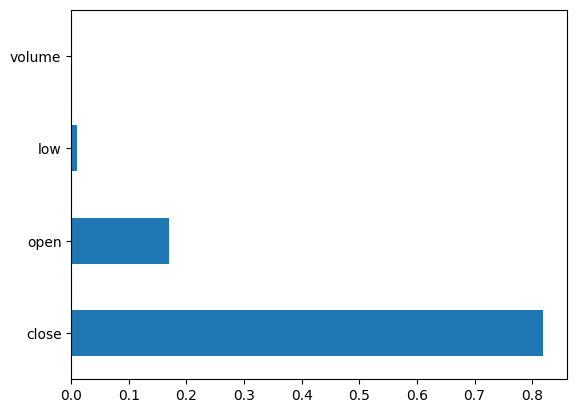

In [190]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['high']-TestingDataResults['Predictedhigh']))/TestingDataResults['high'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

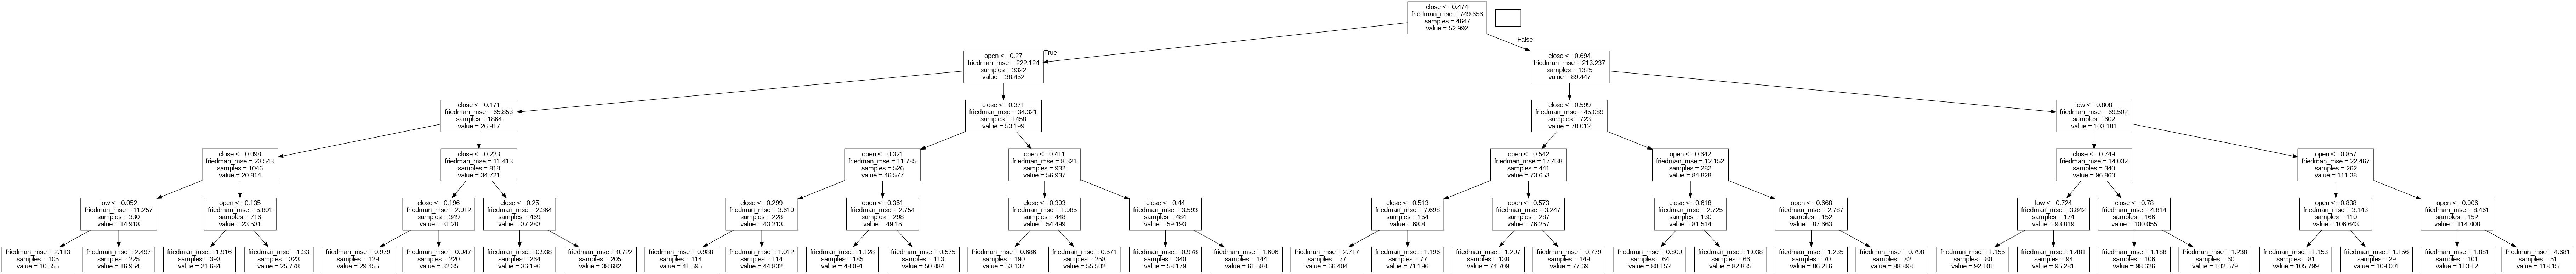

In [191]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors) # Remove class_names for regression


#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double-click on the graph to zoom in

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.996258641309678

##### Model Validation and Accuracy Calculations ##########
       open       low     close  volume    high  Predictedhigh
0  0.334683  0.337410  0.335100     0.0   47.54           49.0
1  0.502530  0.509469  0.512788     0.0   68.21           68.0
2  0.119686  0.122887  0.122665     0.0   21.85           23.0
3  0.249663  0.252144  0.254417     0.0   37.65           37.0
4  0.875843  0.870998  0.871025     0.0  111.69          115.0
Mean Accuracy on test data: 95.675328748515
Median Accuracy on test data: 97.7336327490655

Accuracy values for 10-fold Cross Validation:
 [96.2520956  92.31335095 96.67624995 93.02809603 73.77033573 97.85475085
 97.84415209 97.54290656 97.73315978 97.26907368]

Final Average Accuracy of the model: 94.03


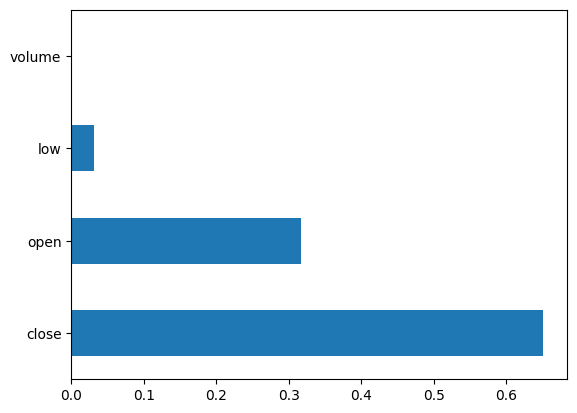

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['high']-TestingDataResults['Predictedhigh']))/TestingDataResults['high'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

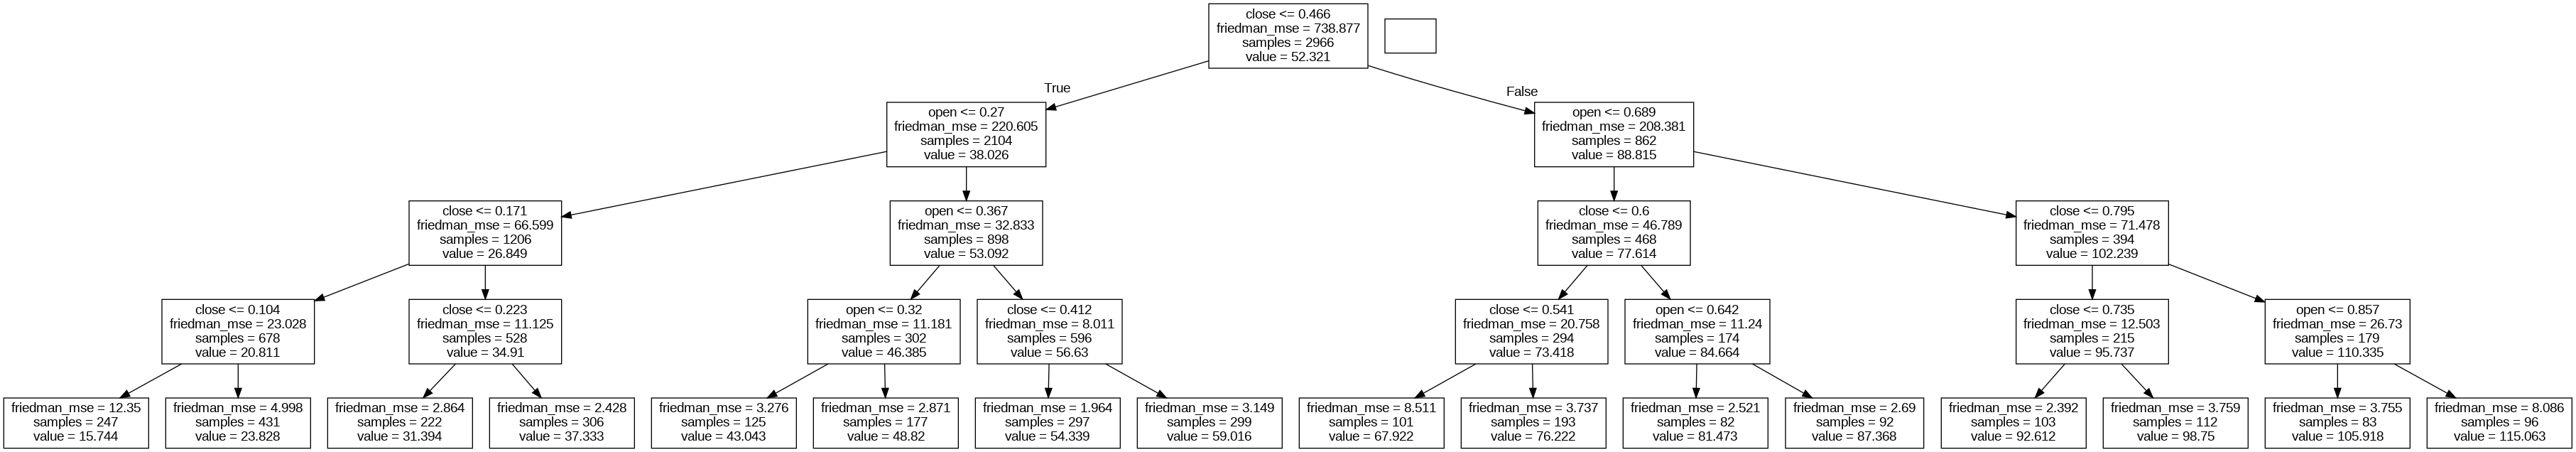

In [ ]:
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
# Removing the class_names argument
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double-click on the graph to zoom in

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9874194246823305

##### Model Validation and Accuracy Calculations ##########
       open       low     close  volume    high  Predictedhigh
0  0.334683  0.337410  0.335100     0.0   47.54           46.0
1  0.502530  0.509469  0.512788     0.0   68.21           71.0
2  0.119686  0.122887  0.122665     0.0   21.85           20.0
3  0.249663  0.252144  0.254417     0.0   37.65           35.0
4  0.875843  0.870998  0.871025     0.0  111.69          112.0
Mean Accuracy on test data: 92.66827528649962
Median Accuracy on test data: 95.39398369434332

Accuracy values for 10-fold Cross Validation:
 [91.76600783 89.07292865 94.2555468  94.12720287 60.16465789 94.60177776
 95.92341731 94.32449787 96.60050225 97.55173965]

Final Average Accuracy of the model: 90.84


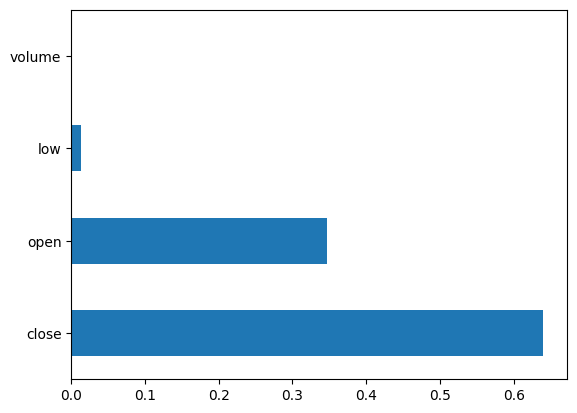

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['high']-TestingDataResults['Predictedhigh']))/TestingDataResults['high'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9997998976798858

##### Model Validation and Accuracy Calculations ##########
       open       low     close  volume    high  Predictedhigh
0  0.334683  0.337410  0.335100     0.0   47.54           48.0
1  0.502530  0.509469  0.512788 

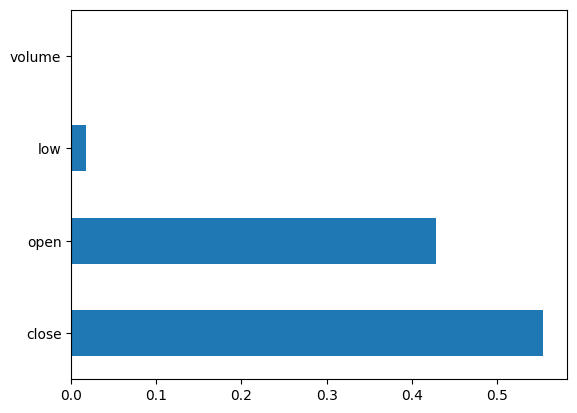

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['high']-TestingDataResults['Predictedhigh']))/TestingDataResults['high'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

<Axes: >

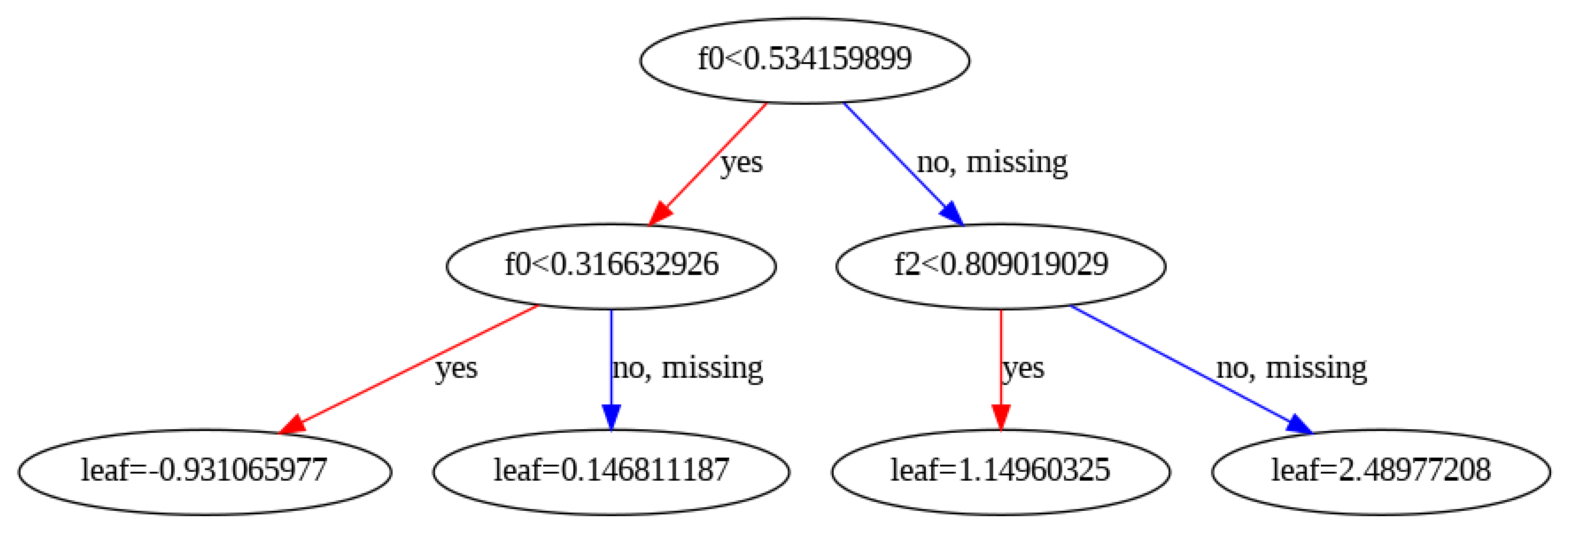

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# 12. Training/Testing Sampling and K- fold cross validation

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['high']-TestingDataResults['Predictedhigh']))/TestingDataResults['high'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9998997766543954

##### Model Validation and Accuracy Calculations ##########
       open       low     close  volume    high  Predictedhigh
0  0.334683  0.337410  0.335100     0.0   47.54           47.0
1  0.502530  0.509469  0.512788     0.0   68.21           68.0
2  0.119686  0.122887  0.122665     0.0   21.85           22.0
3  0.249663  0.252144  0.254417     0.0   37.65           38.0
4  0.875843  0.870998  0.871025     0.0  111.69          112.0
Mean Accuracy on test data: 99.0950033696335
Median Accuracy on test data: 99.33113976415768

Accuracy values for 10-fold Cross Validation:
 [98.8361444  99.24144402 99.48532681 99.30671441 91.17665692 99.53015031
 99.62043971 99.62963944 99.38185102 99.4795387 ]

Final Average Accuracy of the model: 98.57


In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['high']-TestingDataResults['Predicted'+ TargetVariable]))/TestingDataResults['high']) # Added the TargetVariable name here with "Predicted" prefix

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.9996608084282836

##### Model Validation and Accuracy Calculations ##########
       open       low     close  volume    high  Predictedhigh
0  0.334683  0.337410  0.335100     0.0   47.54           48.0
1  0.502530  0.509469  0.512788     0.0   68.21           68.0
2  0.119686  0.122887  0.122665     0.0   21.85           22.0
3  0.249663  0.252144  0.254417     0.0   37.65           38.0
4  0.875843  0.870998  0.871025     0.0  111.69          112.0
Mean Accuracy on test data: 98.98048053844327
Median Accuracy on test data: 99.2679050568941

Accuracy values for 10-fold Cross Validation:
 [98.31689232 99.09031641 99.55386758 99.37347612 98.90716127 99.5076312
 99.57891793 99.50554101 99.45227024 99.43884569]

Final Average Accuracy of the model: 99.27


Visualizing individual trees is not supported for Support Vector Regression models.


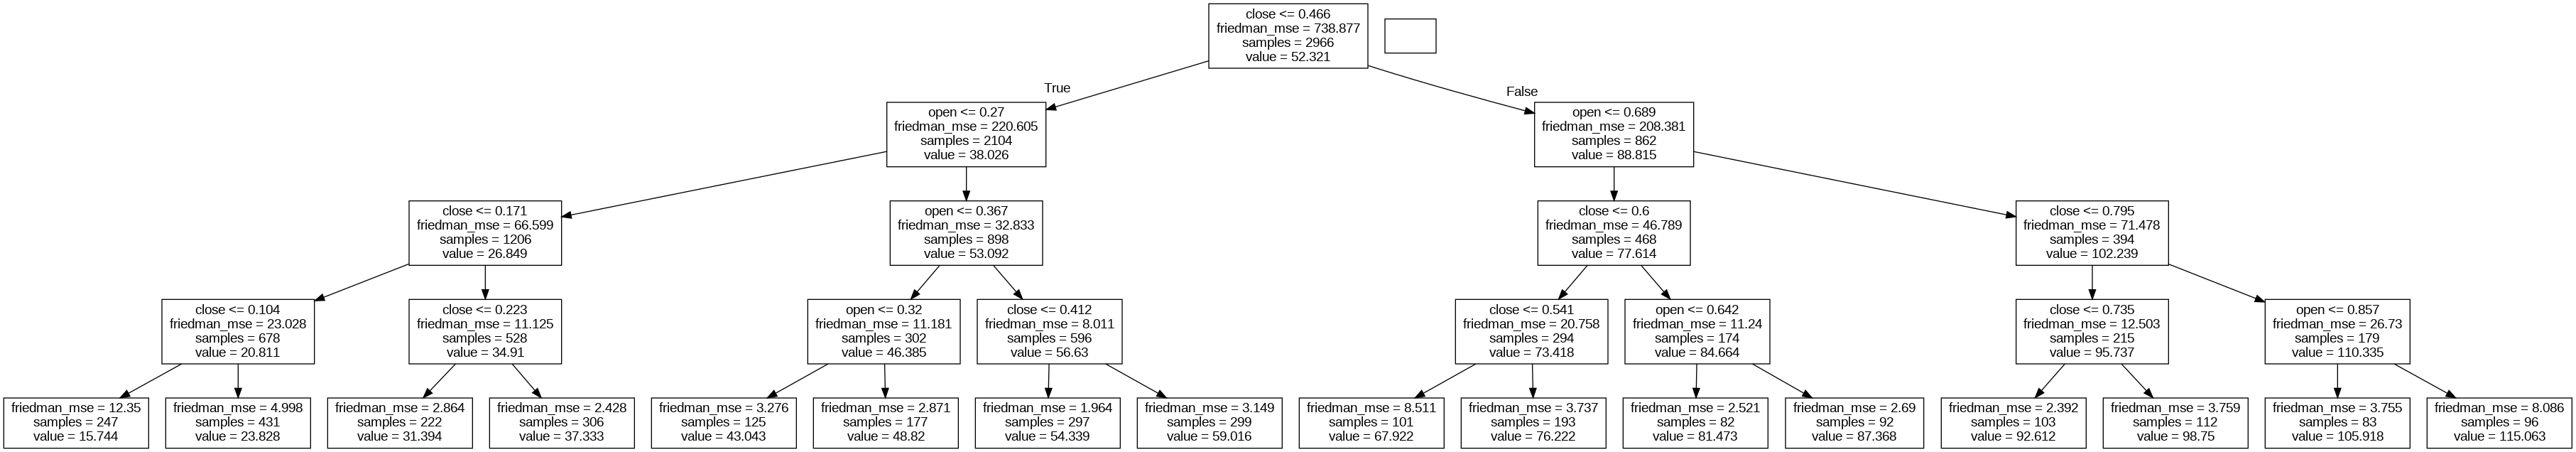

In [ ]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
print("Visualizing individual trees is not supported for Support Vector Regression models.")

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.987605442319262

##### Model Validation and Accuracy Calculations ##########
       open       low     close  volume    high  Predictedhigh
0  0.334683  0.337410  0.335100     0.0   47.54           46.0
1  0.502530  0.509469  0.512788     0.0   68.21           71.0
2  0.119686  0.122887  0.122665     0.0   21.85           20.0
3  0.249663  0.252144  0.254417     0.0   37.65           35.0
4  0.875843  0.870998  0.871025     0.0  111.69          112.0
Mean Accuracy on test data: 93.01571284455025
Median Accuracy on test data: 95.38306865989696

Accuracy values for 10-fold Cross Validation:
 [91.66285458 89.43540147 94.34355801 94.24665785 60.26502079 94.56559998
 96.29470434 94.3389756  96.67187198 97.52740301]

Final Average Accuracy of the model: 90.94


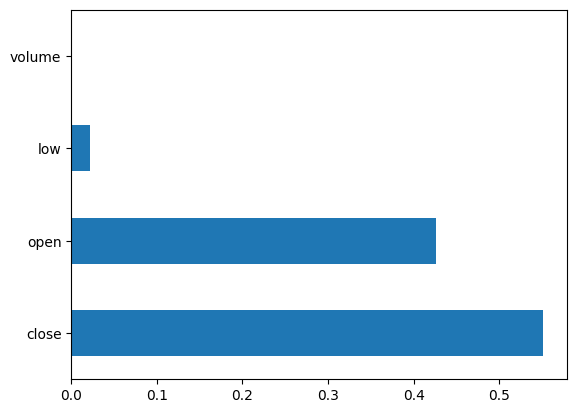

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['high']-TestingDataResults['Predictedhigh']))/TestingDataResults['high'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9997998976798858

##### Model Validation and Accuracy Calculations ##########
       open       low     close  volume    high  Predictedhigh
0  0.334683  0.337410  0.335100     0.0   47.54           48.0
1  0.502530  0.509469  0.512788 

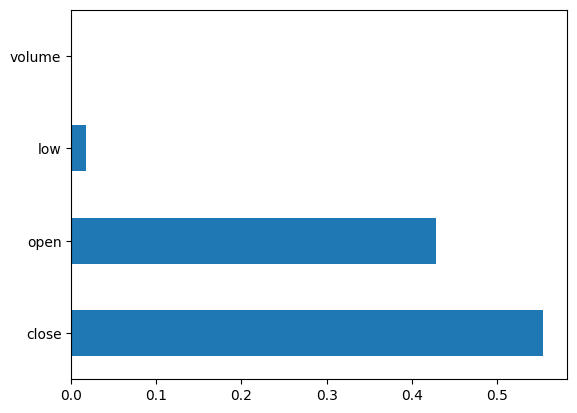

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics

print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['high']-TestingDataResults['Predictedhigh']))/TestingDataResults['high'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Decision Tree out of XGBoost

<Axes: >

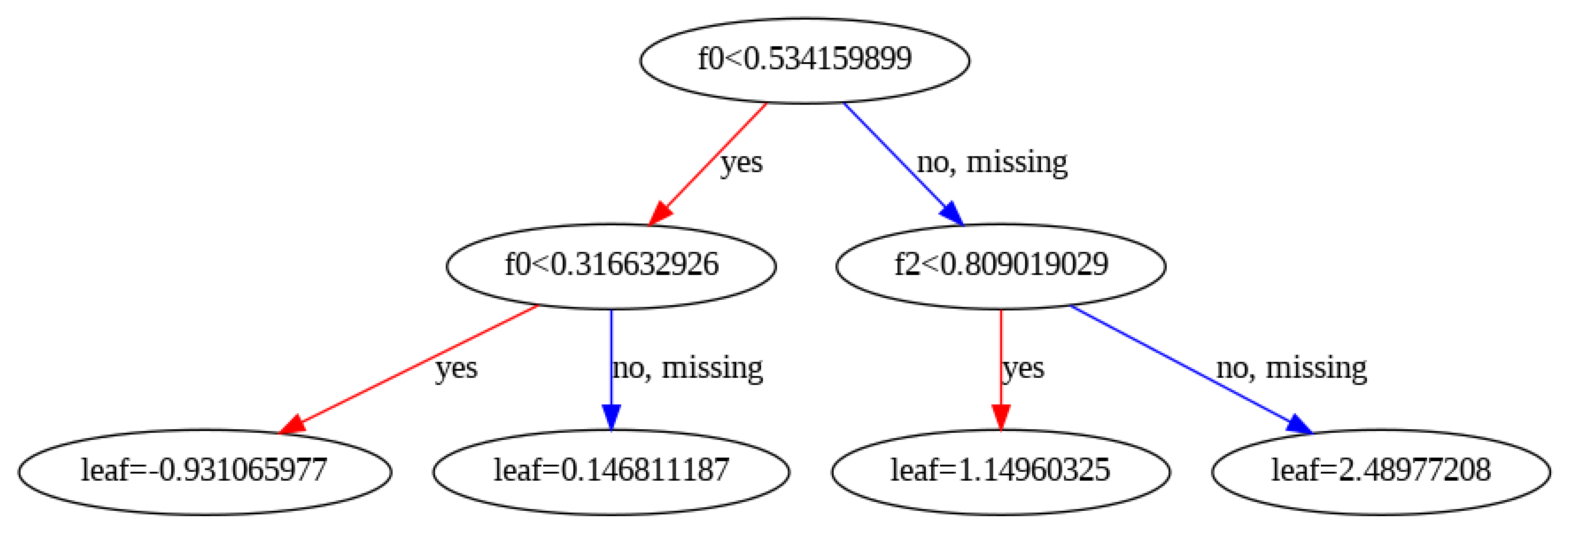

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['high']-TestingDataResults['Predictedhigh']))/TestingDataResults['high'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9998997766543954

##### Model Validation and Accuracy Calculations ##########
       open       low     close  volume    high  Predictedhigh
0  0.334683  0.337410  0.335100     0.0   47.54           47.0
1  0.502530  0.509469  0.512788     0.0   68.21           68.0
2  0.119686  0.122887  0.122665     0.0   21.85           22.0
3  0.249663  0.252144  0.254417     0.0   37.65           38.0
4  0.875843  0.870998  0.871025     0.0  111.69          112.0
Mean Accuracy on test data: 99.0950033696335
Median Accuracy on test data: 99.33113976415768

Accuracy values for 10-fold Cross Validation:
 [98.8361444  99.24144402 99.48532681 99.30671441 91.17665692 99.53015031
 99.62043971 99.62963944 99.38185102 99.4795387 ]

Final Average Accuracy of the model: 98.57


# Support Vector Machine (SVM) Regressor

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['high']-TestingDataResults['Predictedhigh']))/TestingDataResults['high'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # might negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.9996608084282836

##### Model Validation and Accuracy Calculations ##########
       open       low     close  volume    high  Predictedhigh
0  0.334683  0.337410  0.335100     0.0   47.54           48.0
1  0.502530  0.509469  0.512788     0.0   68.21           68.0
2  0.119686  0.122887  0.122665     0.0   21.85           22.0
3  0.249663  0.252144  0.254417     0.0   37.65           38.0
4  0.875843  0.870998  0.871025     0.0  111.69          112.0
Mean Accuracy on test data: 98.98048053844327
Median Accuracy on test data: 99.2679050568941

Accuracy values for 10-fold Cross Validation:
 [98.31689232 99.09031641 99.55386758 99.37347612 98.90716127 99.5076312
 99.57891793 99.50554101 99.45227024 99.43884569]

Final Average Accuracy of the model: 99.27


In [ ]:
TargetVariable='high'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['open', 'close', 'volume']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(6639, 3)
(6639,)


# Cross validating the final model

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [98.70178103 98.90172115 99.33631663 99.12721933 89.46569027 99.39904416
 99.51191333 99.46479679 99.23437589 99.27157106]

Final Average Accuracy of the model: 98.24


In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


In [ ]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['open', 'close', 'volume']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

In [ ]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[4.98,6.575,15.3],[4.98,3.2,10.3]],columns=['open', 'close', 'volume'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   open  close  volume
0  4.98  6.575    15.3
1  4.98  3.200    10.3


,Prediction
0,8.788678
1,8.788678


# 15. Deployment of the best model in production

In [ ]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_open , inp_close, inp_volume):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_open , inp_close, inp_volume]],
     columns=['open', 'close', 'volume'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_open=4.98,
                           inp_close=6.5,
                           inp_volume=15.3
                             )

'{"Prediction":{"0":8.7886781693}}'

# 16. GUI/WEB Deployment using either tkinter/Flask/Streamlit

In [ ]:
!pip install flask

In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [ ]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        open_value = float(request.args.get('open'))
        close_value=float(request.args.get('close'))
        volume_value=float(request.args.get('volume'))

        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_open=open_value,
                                                       inp_close=close_value,
                                                       inp_volume=volume_value
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

In [147]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

class StarbucksStockPricePredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Starbucks Stock Price Prediction')
        self.data = pd.read_csv(r'/Users/thobosebinanyane/Documents/DATA/SBUX.US_D1 (2).csv')

        # Encode any categorical columns (if necessary)
        categorical_cols = self.data.select_dtypes(include=['object']).columns
        if len(categorical_cols) > 0:
            le = LabelEncoder()
            for col in categorical_cols:
                self.data[col] = le.fit_transform(self.data[col])

        self.entries = []

        self.X = self.data.drop('high', axis=1).values
        self.y = self.data['high'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = XGBRegressor()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()

    def create_widgets(self):
        columns = self.data.columns[:-1]  # All columns except the target 'high'
        for i, column in enumerate(columns):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            if self.data[column].dtype in [int, float]:
                slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal")
                slider.grid(row=i, column=1)
                current_val_label = tk.Label(self.master, text='0.0')
                current_val_label.grid(row=i, column=2)
                def update_label(slider, label):
                    def inner(val):
                        label.config(text=f'{slider.get():.2f}')
                    return inner
                slider.config(command=update_label(slider, current_val_label))
                self.entries.append(slider)
            else:
                entry = tk.Entry(self.master)
                entry.grid(row=i, column=1)
                self.entries.append(entry)

        predict_button = tk.Button(self.master, text='Predict Price', command=self.predict_price)
        predict_button.grid(row=len(columns), columnspan=3)

    def predict_price(self):
        inputs = [float(entry.get()) if isinstance(entry, tk.Entry) else float(entry.get()) for entry in self.entries]
        price = self.model.predict([inputs])
        messagebox.showinfo('Predicted Price', f'The predicted stock price is ${price[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = StarbucksStockPricePredictionApp(root)
    root.mainloop()


# Run the Tkinter app outside of a Jupyter Notebook environment
# if __name__ == '__main__':
#     root = tk.Tk()
#     # Renamed app variable to avoid overwriting Flask app
#     app_tk = HousePricePredictionApp(root)
#     root.mainloop()

# END OF PROGRAMMING PROJECT